### Lab 4 - K-Nearest Neighbors

Paige Rosynek

9.28.2022

#### Introduction

The goal of this lab is to implement and use the K-Nearest Neighbors (KNN) algorithm. KNN is a lazy-learning, non-parametric algorithm used for classification and regression. The steps of KNN is: 

- Given a query point, calculate the distance between every reference point and the query point
    
- Sort distances by smallest to largest

- Take the k-closest neighbors

- Get the labels of the k-closest neighbors

- Aggregate the labels to predict the label for the query point (mode for classification and average for regression)

In this lab, we will be training and testing different datasets with KNN. In addition, we will be analyzing and interpreting decision boundaries as well as the relationship between k and the model accuracy. In the last problem, we will be using cross fold validation to help find the best model that classifies the sweep.csv data. 

#### Reflection Questions

##### Problem 1 - KNN

1) Estimate the run time complexity in big-o notation of training a KNN model. Justify your answer.

The run time complexity of training a KNN model is $O(1)$ because the "training" step of KNN only includes storing the feature vector and label vector for the training data, so only assignment is done.

2) Estimate the run time complexity in big-o notation of predicting the output value for a query point using a training set of N points, with p features, and k neighbors with a KNN model. Justify your answer.

The time complexity of predicting the output of a query point with KNN is $O(kNp)$ which simplifies to $O(Np)$. In KNN prediction, the distance from each reference point to the query point has to be calculated. For this step, we need to loop through each of the features $p$ and then repeat this for every point in the training set, so the distance computation has to be done $N$ times. Thus, the time complexity of calculating the distances is $O(Np)$. The next step involves sorting the neighbor list with a mini heap of $N$ distances which requires $O(N)$ to build and then takes $O(klog(n))$ to extract the k smallest values, so the total time complexity for this step is $O(N + klog(N))$. The last step, aggregating the k labels from the label vector takes $O(k)$. Therefore, the time complexity for the prediction step is $O(Np + N + klog(N)) + k$ which reduces to $O(Np)$.

3) What do you think the potential downsides of the k nearest neighbors algorithm are? Why do you think it might not be used as widely as other methods?

One downside of KNN is it has a large prediction time complexity because the distances between each reference point to the query point has to be calculated every time a prediction is made since KNN is a lazing learning algorithm. In addition, KNN requires all of the training data to be stored by the model which is not memory efficient for large amounts of data. Another downside to KNN is that it is sensitive to feature scaling, and feature data that has different scales affects the performance of the model. The last drawback of KNN is that is does not perform well with high-dimensional input and thus suffers the curse of dimensionality. I think it is not widely used because KNN is only shines for recommendation systems problems, and when it comes to other classification problems there are better models that handle some of the above drawbacks making them better fit for a wider variety of problems.

#### Problem 2 - Decision Boundaries

1) For each of the three data sets, do you think a linear decision boundary could be used to accurately classify the data points?

For the circles.csv data, cannot be separated by a linear decision boundary to accurately clasify the data points because the points of the same class are arranged in a circle-type shape that is non linear. For the moons.csv data, a linear decision boundary might do a moderately accurate job of separating the data because the points are generally linear (except for the points from -1 to 0), however a nonlinear model would perform better on this dataset. For the rocky_ridge.csv data, a linear decision boundary would do a good job separating the classes because it can be observed from the graph that each class seems to be on one or the other side of zero.

2) What do we mean by a "non-linear" decision boundary? Give an example of a non-linear function that could be used as a decision boundary for one of the data sets.

A non-linear decision boundary refers to a line or plane that is **not** of the form, $w_1x_1 + w_2x_2 + ... + w_mx_m = w_0$ for $m$ dimensions, that is used to classify data. A non-linear decision boundary separates points in feature space with a non-straight line. For example, the function of a circle or ellipse would be a nonlinear model that could be used as a decision boundary for the circles.csv data.

3) What are the advantages of non-linear decision boundaries over linear decision boundaries? What are the disadvantages?

Non-linear models are more flexible than linear models which allows for points to be better separated in feature space. Non-linear models are more complex models than linear models and can capture more flexible relatioships in feature space. However, non-linear models are more prone to overfitting and tend to be more computationally expensive than linear models, which are computionally fast. Another disadvantage to non-linear models is that not all of them are interpretable; this is unlike linear models where each weight expresses the importance of each feature.

##### Problem 3 - Choosing an Optimal Value for k

1) What value of k gave the highest accuracy?

For $k = 21$ and $k = 41$ the model had the highest accuracy of 86.7%

2) For large values of k, what happened to the accuracy? Why do you think this is?

For large values of $k$, the accuracy plateaued at about 78%. This happened because for really large $k$, the decision boundary becomes too simple and closer to a linear decision boundary. The model most likely plateaued at about $0.78$ probably due to the data containing a different amount of samples for each class.

3) Let's say that we ask you to use the following experimental setup to find a value of k that maximizes the accuracy of the model's predictions: split the data set into training and testing sets, train a model for each value of k using the training set, predictions the classes of the testing points, and evaluate the accuracy of the predictions. Could this approach give you misleading results? If so, why?

Yes, this could produce misleading results because if you only split the data set once, the one split of the data might produce a model that has a high accuracy for $k = 13$ but if you had split the data in another way, the model could produce a model with just as good of an accuracy with $k = 3$. Therefore, cross-validation is a better method because it allows for different splits to be used to train the model and then tested, so different splits are used to find the best model.

4) It is considered a "best practice" to use cross-fold validation when optimizing parameters. Why do you think that is?

It is best practice to use cross-fold validation for model selection so the best model can be found from the data. As explained above, certain splits of the data may perform better than others so cross validation allows for different splits of data to be trained and tested to find the best model for the data. 

In [40]:
from knn import KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from matplotlib.lines import Line2D

#### Test knn.py

In [41]:
!python test_knn.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


#### 3. Explore Decision Boundarie for 3 Data Sets

##### Import circles.csv, moons.csv, sweep.csv

In [42]:
circles = np.loadtxt('../Data/circles.csv', delimiter=',', skiprows=1)
moons = np.loadtxt('../Data/moons.csv', delimiter=',', skiprows=1)
rocky = np.loadtxt('../Data/rocky_ridge.csv', delimiter=',', skiprows=1)

##### i. Test-train split

In [43]:
circ_train_X, circ_test_X, circ_train_y, circ_test_y = train_test_split(circles[:, 1:3], circles[:,0], test_size=0.2, stratify=circles[:,0]) 
moon_train_X, moon_test_X, moon_train_y, moon_test_y = train_test_split(moons[:, 1:3], moons[:, 0], test_size=0.2, stratify=moons[:,0])
rocky_train_X, rocky_test_X, rocky_train_y, rocky_test_y = train_test_split(rocky[:, 1:3], rocky[:, 0], test_size=0.2, stratify=rocky[:,0])

##### ii. Scale the data

In [44]:
scaler = StandardScaler()

circ_train_X = scaler.fit_transform(circ_train_X)
circ_test_X = scaler.transform(circ_test_X)

moon_train_X = scaler.fit_transform(moon_train_X)
moon_test_X = scaler.transform(moon_test_X)

rocky_train_X = scaler.fit_transform(rocky_train_X)
rocky_test_X = scaler.transform(rocky_test_X)

##### iii. Fit KNN model with k = 3 for each dataset

In [45]:
knn_circ = KNN(3, 'mode')
knn_circ.fit(circ_train_X, circ_train_y)

knn_moon = KNN(3, 'mode')
knn_moon.fit(moon_train_X, moon_train_y)

knn_rocky = KNN(3, 'mode')
knn_rocky.fit(rocky_train_X, rocky_train_y)

##### iv. Evaluate the model for each point on 2D grid

In [46]:
x1 = np.linspace(-3, 3, 300)
x2 = np.linspace(-3, 3, 300)
x1s, x2s = np.meshgrid(x1, x2)

X = np.hstack((x1s.reshape(90000, 1), x2s.reshape(90000, 1)))

circ_predict = knn_circ.predict(X)
moon_predict = knn_moon.predict(X)
rocky_predict = knn_rocky.predict(X)

##### v. Plot the predicted values & test data

Note: I didn't adjust the axis limits to remove the white bar at the top of the rocky plot to show the one pink data point.

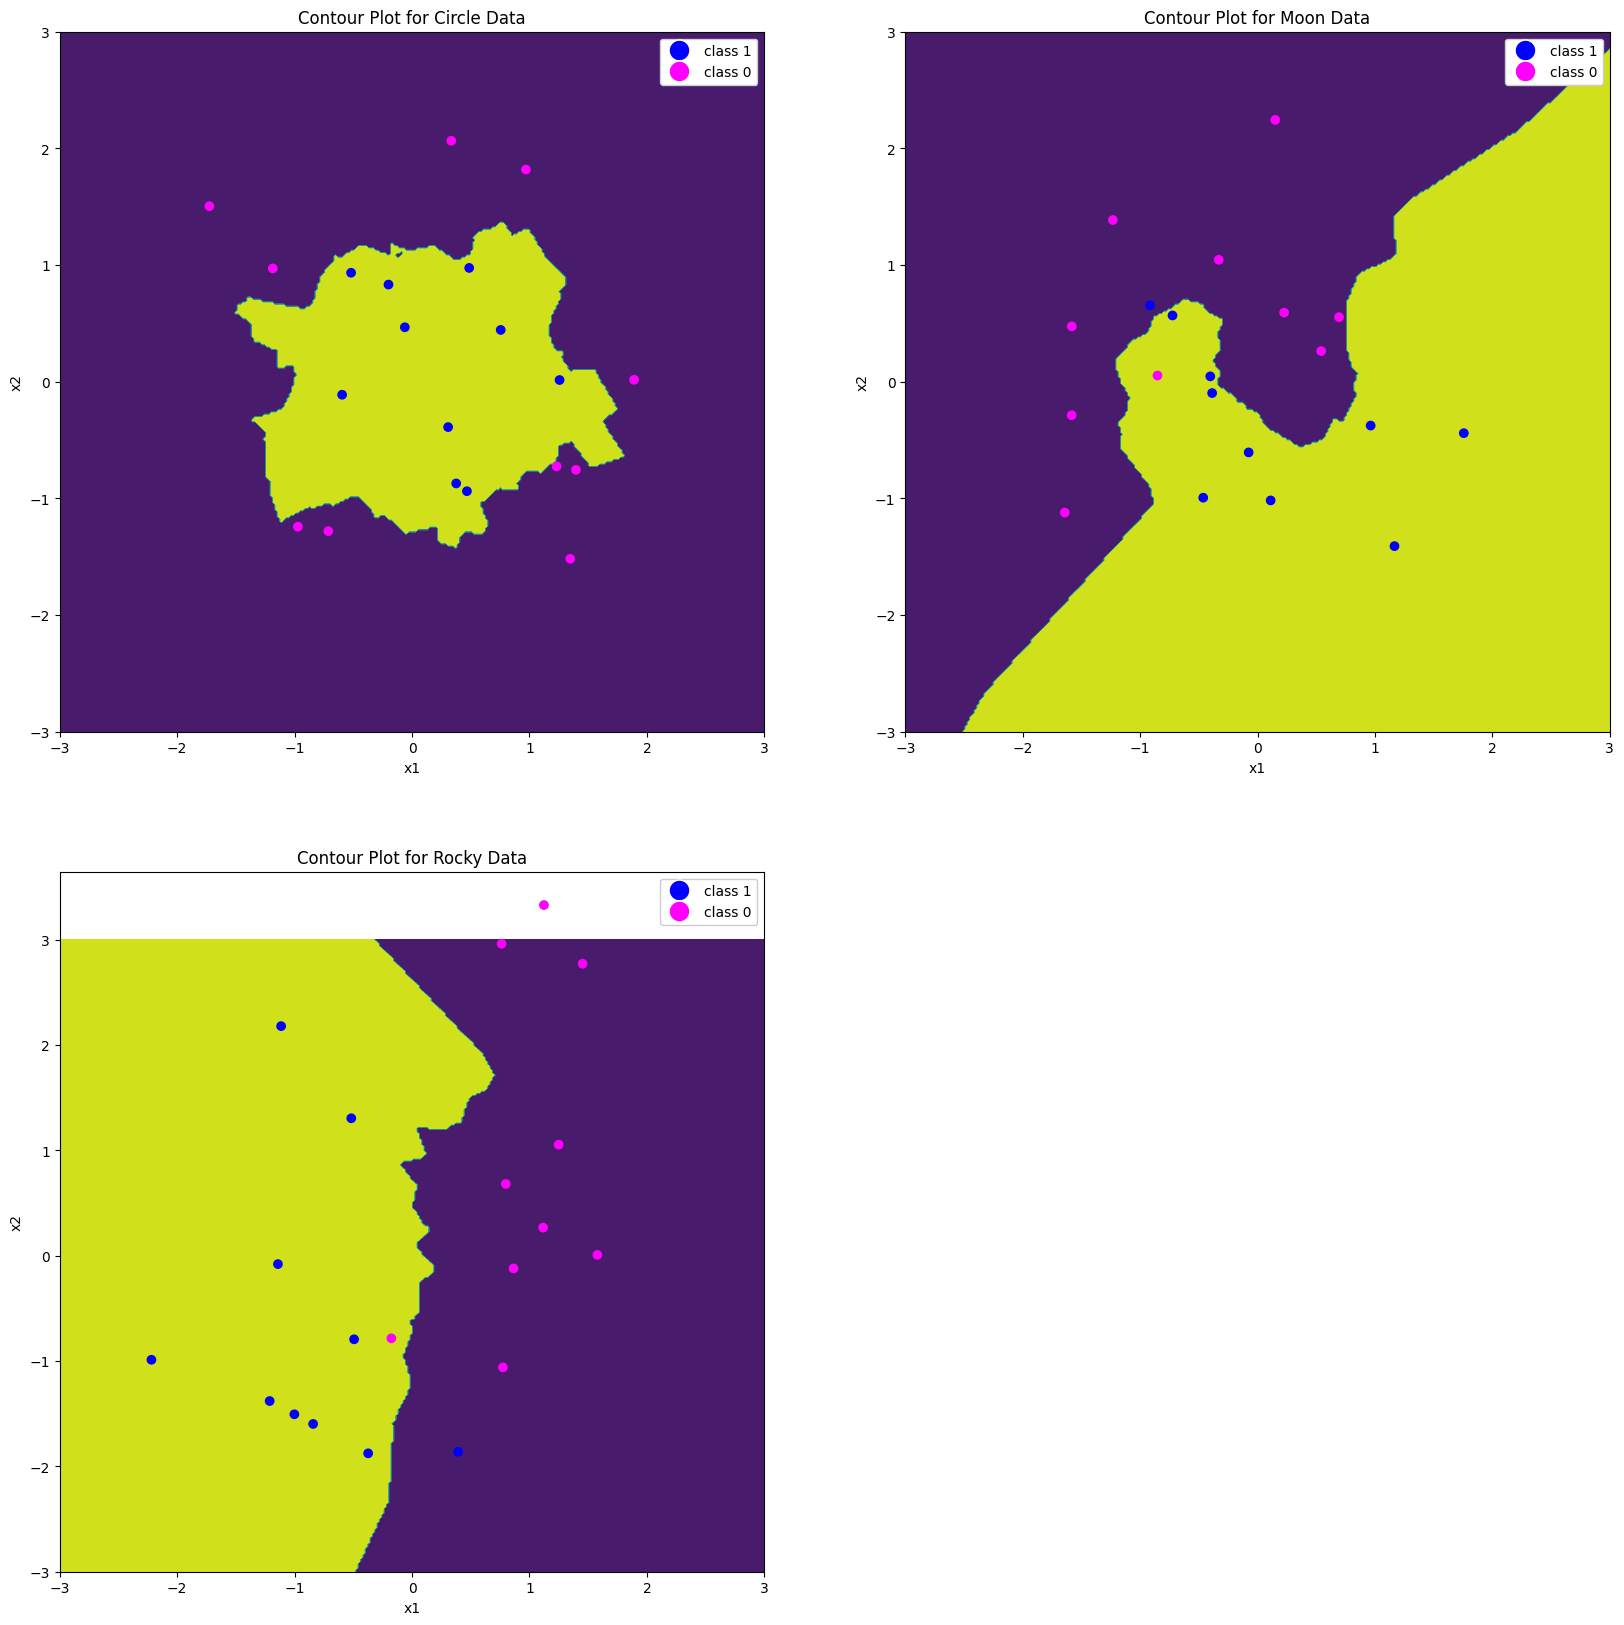

In [47]:
colors = {1.0 : 'blue', 0.0: 'magenta'}
legend_labels = [Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1.0], markersize=15, label='class 1'),
                 Line2D([], [], marker='o', color='w', markerfacecolor=colors[0.0], markersize=15, label='class 0')]

fig, ax = plt.subplots(2,2, figsize=(20, 20))

ax[0,0].contourf(x1s, x2s, circ_predict.reshape(300,300))
ax[0,0].scatter(circ_test_X[:,0], circ_test_X[:,1], c=np.vectorize(colors.get)(circ_test_y))
ax[0,0].set_xlabel('x1')
ax[0,0].set_ylabel('x2')
ax[0,0].set_title('Contour Plot for Circle Data')
ax[0,0].legend(handles=legend_labels, framealpha=1)

ax[0,1].contourf(x1s, x2s, moon_predict.reshape(300,300))
ax[0,1].scatter(moon_test_X[:,0], moon_test_X[:,1], c=np.vectorize(colors.get)(moon_test_y))
ax[0,1].set_xlabel('x1')
ax[0,1].set_ylabel('x2')
ax[0,1].set_title('Contour Plot for Moon Data')
ax[0,1].legend(handles=legend_labels, framealpha=1)

ax[1,0].contourf(x1s, x2s, rocky_predict.reshape(300,300))
ax[1,0].scatter(rocky_test_X[:,0], rocky_test_X[:,1], c=np.vectorize(colors.get)(rocky_test_y))
ax[1,0].set_xlabel('x1')
ax[1,0].set_ylabel('x2')
ax[1,0].set_title('Contour Plot for Rocky Data')
ax[1,0].legend(handles=legend_labels, framealpha=1)

ax[1,1].set_visible(False)

#### Choosing Optimal Value for k

##### 1. Load sweep.csv

In [48]:
sweep = np.loadtxt('../Data/sweep.csv', delimiter=',', skiprows=1)
sweep_X = sweep[:,1:]
sweep_y = sweep[:,0]

##### 2. Evaluate the impact of k using cross-fold validation (10-fold)

In [49]:
ks = np.arange(1,200,10)
skf = StratifiedKFold(n_splits=10, shuffle=True)
mean_accs = np.zeros(20)
stdvs = np.zeros(20)

k_indx = 0
for k in ks:
    knn = KNN(k, 'mode')
    acc = np.zeros(10)
    indx = 0
    for train_index, test_index in skf.split(sweep_X, sweep_y):
        train_fold_X, test_fold_X = sweep_X[train_index], sweep_X[test_index]
        train_fold_y, test_fold_y = sweep_y[train_index], sweep_y[test_index]
        knn.fit(train_fold_X, train_fold_y)
        y_hat = knn.predict(test_fold_X)
        acc[indx] = accuracy_score(test_fold_y, y_hat)
        indx += 1
    mean_accs[k_indx] = np.mean(acc)
    stdvs[k_indx] = np.std(acc)
    k_indx += 1

##### 3. Plot the average and standard deviation for each value of k

Text(0.5, 1.0, 'Accuracy v. k')

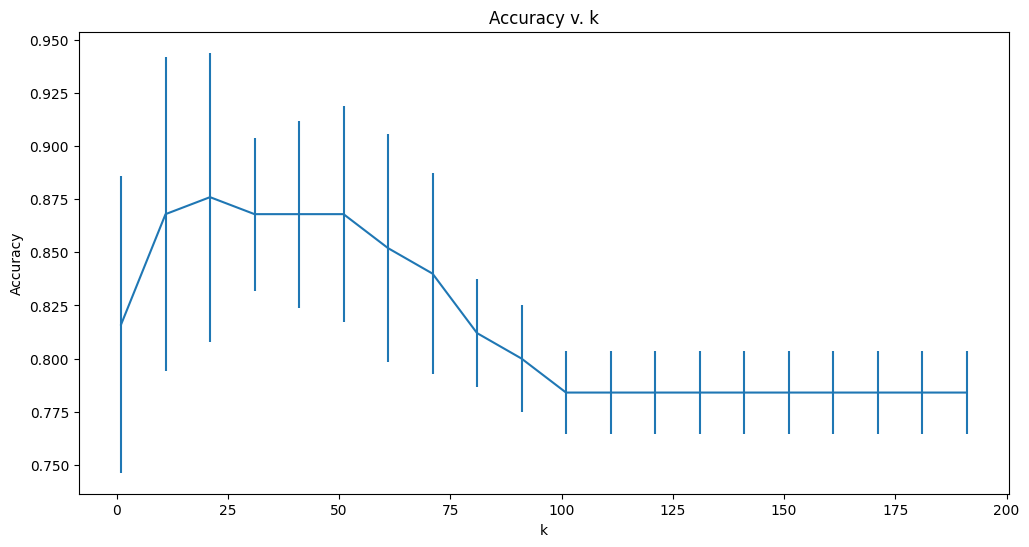

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(ks, mean_accs, stdvs)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy v. k')